In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [50]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [51]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [52]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [53]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

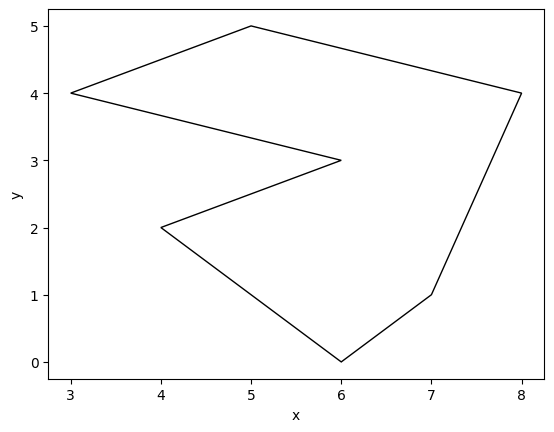

In [54]:
%matplotlib inline
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [55]:
%matplotlib tk

polygon = []
activate = True

def draw_point(point):
    plt.scatter(point[0],point[1],color="blue")
    plt.draw()

def draw_line(point1, point2):
    x = [point1[0],point2[0]]
    y = [point1[1],point2[1]]
    plt.plot(x,y,color="red")
    plt.draw()

def click(event):
    global activate
    if event:
        if event.button == 1:
            x, y = event.xdata, event.ydata
            if x is None or y is None:
                return
            draw_point((x,y))
            polygon.append((x,y))
            if len(polygon) > 1:
                draw_line(polygon[-1],polygon[-2])
        elif event.button == 3:
            draw_line(polygon[-1],polygon[0])
            activate = False
            plt.draw()
            plt.pause(3)
            plt.close()

fig, ax = plt.subplots()
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_title("Lewy przycisk: dodaj punkt, Prawy przycisk: zamknij wielokąt")

fig.canvas.mpl_connect("button_press_event", click)

plt.show(block = True)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [56]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    sorted_points = sorted(polygon, key = lambda x: x[1])
    y_min = sorted_points[0]
    y_max = sorted_points[-1]
    ind_min = polygon.index(y_min)
    ind_max = polygon.index(y_max)
    if ind_min < ind_max:
        right_points = polygon[ind_min:ind_max+1]
        left_points = polygon[ind_max:] + polygon[:ind_min+1]
    else:
        left_points = polygon[ind_max:ind_min+1]
        right_points = polygon[ind_min:] + polygon[:ind_max+1]
    #right_points maja rosnac
    #left_points maja malec
    for i in range(1,len(left_points)):
        if left_points[i-1][1] < left_points[i][1]:
            return False
    for i in range(1,len(right_points)):
        if right_points[i-1][1] > right_points[i][1]:
            return False
    return True
    

Przeprowadź test poprawności powyższej funkcji.

In [57]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.031s


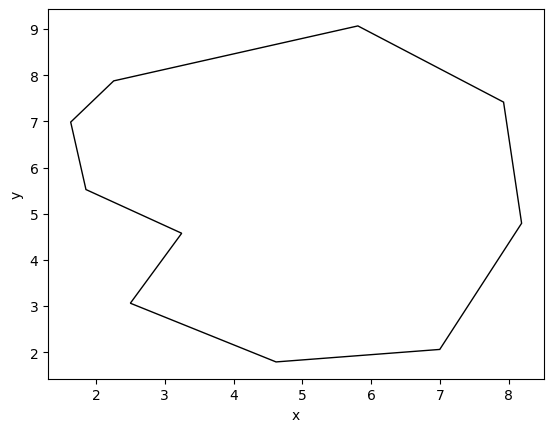

In [58]:
%matplotlib inline
draw_polygon(polygon)

Sprawdź monotoniczność swojego wielokątu.

In [59]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

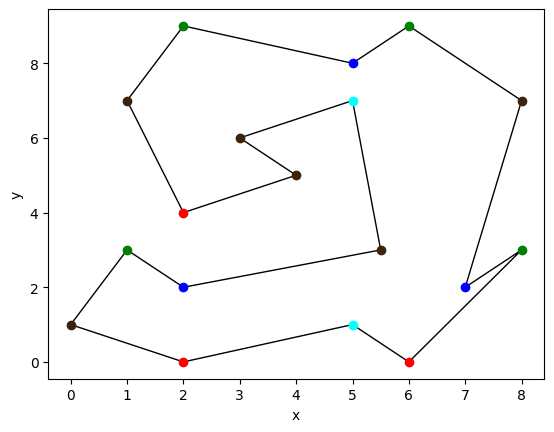

In [60]:
%matplotlib inline
draw_polygon_colors(polygon_example_2,polygon_example_colors)
# colors_start = ['green']
# color_end=['red']
# color_connect=['blue']
# color_divide=['cyan']
# color_regular=['#3B240B']

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [61]:
def mat_det_3x3(a, b, c):
    return a[0]*b[1]+a[1]*c[0]+b[0]*c[1]-b[1]*c[0]-a[1]*b[0]-a[0]*c[1]

In [62]:
def color_point(a,b,point):
    det = mat_det_3x3(a,b,point)
    if a[1] < point[1] and b[1] < point[1]:
        if det > 10**(-14):
            return 3
        elif det < (-10)**(-14):
            return 0
        else:
            return 4
    elif a[1] > point[1] and b[1] > point[1]:
        if det > 10**(-14):
            return 2
        elif det < (-10)**(-14):
            return 1
        else:
            return 4
    return 4

In [63]:
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    colors = [None] * len(polygon)
    sorted_points = sorted(polygon, key = lambda x: x[1])
    y_min = sorted_points[0]
    ind_min = polygon.index(y_min)
    for i in range(ind_min+1,len(polygon)-1):
        colors[i] = color_point(polygon[i-1],polygon[i+1],polygon[i])
    colors[-1] = color_point(polygon[-2],polygon[0],polygon[-1])
    colors[0] = color_point(polygon[-1],polygon[1],polygon[0])
    for i in range(1,ind_min):
        colors[i] = color_point(polygon[i-1],polygon[i+1],polygon[i])
    if colors[ind_min] == None:
        colors[ind_min] = color_point(polygon[ind_min-1],polygon[ind_min+1],polygon[ind_min])
    return colors


Przeprowadź test poprawności powyższej funkcji. 

In [64]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

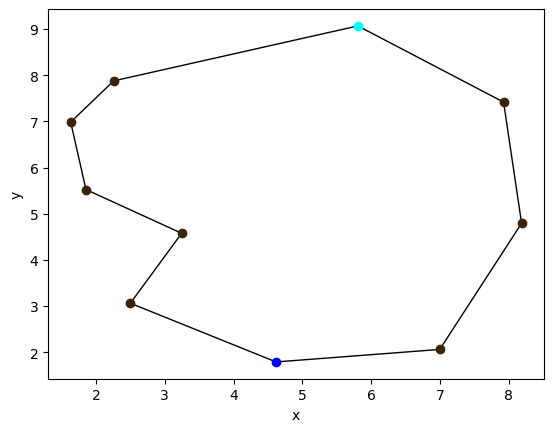

In [65]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

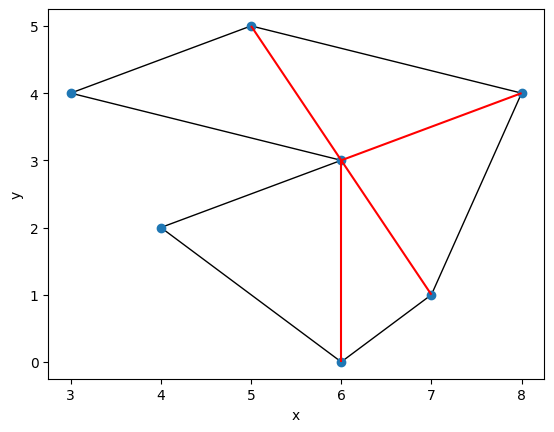

In [66]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [67]:
def merge(left_points,right_points):
    result = []
    i, j = 0, 0
    while i < len(left_points) and j < len(right_points):
        if left_points[i][1] > right_points[j][1]:
            result.append((left_points[i][0], left_points[i][1], left_points[i][2], 'l'))
            i+=1
        else:
            result.append((right_points[j][0], right_points[j][1], right_points[j][2], 'r'))
            j+=1
    while i < len(left_points):
        result.append((left_points[i][0], left_points[i][1], left_points[i][2], 'l'))
        i+=1
    while j < len(right_points):
        result.append((right_points[j][0], right_points[j][1], right_points[j][2], 'r'))
        j+=1
    return result


In [68]:
def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    if not is_y_monotonic(polygon):
        print("Polygon is not y-monotonic")
        return []
    sorted_points = sorted(polygon, key = lambda x: x[1])
    y_min = sorted_points[0]
    y_max = sorted_points[-1]
    ind_min = polygon.index(y_min)
    ind_max = polygon.index(y_max)
    left_points=[]
    right_points=[]
    if ind_min<ind_max:
        for i in range(ind_max-1,ind_min-1,-1):
            right_points.append((polygon[i][0],polygon[i][1],i))
        for i in range(ind_max,len(polygon)):
            left_points.append((polygon[i][0],polygon[i][1],i))
        for i in range(ind_min):
            left_points.append((polygon[i][0],polygon[i][1],i))
    else:
        for i in range(ind_max,ind_min):
            left_points.append((polygon[i][0],polygon[i][1],i))
        for i in range(ind_max-1,-1,-1):
            right_points.append((polygon[i][0],polygon[i][1],i))
        for i in range(len(polygon)-1,ind_min-1,-1):
            right_points.append((polygon[i][0],polygon[i][1],i))
    monotonic_points = merge(left_points,right_points)
    stack = [monotonic_points[0],monotonic_points[1]]
    lines = []
    for i in range(2,len(monotonic_points)):
        current_point = monotonic_points[i]
        if current_point[3] != stack[-1][3]:
            for j in range(len(stack)-1,-1,-1):
                if abs(current_point[2]-stack[j][2]) != 1 and abs(current_point[2]-stack[j][2]) != 0 and abs(current_point[2]-stack[j][2]) != len(polygon)-1:
                    lines.append((current_point[2],stack[j][2]))
            stack=[stack[-1]]
        else:
            last=len(stack)-1
            for j in range(len(stack)-2, -1, -1):
                if abs(current_point[2]-stack[j][2]) != 1 and abs(current_point[2]-stack[j][2]) != 0 and abs(current_point[2]-stack[j][2]) != len(polygon)-1:
                    if current_point[3]=='r' and mat_det_3x3(current_point, stack[j], stack[last])<0 or current_point[3]=='l' and mat_det_3x3(stack[j], current_point, stack[last])<0:
                        lines.append((current_point[2],stack[j][2]))
                        for k in range(len(stack)-1,last-1,-1):
                            stack.pop()
                        last=j
        stack.append(current_point)
    return lines

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [69]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.031s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

Poniżej przedstawiam dane na temat wielokąta dla którego algorytm wykonuje triangulacje:
- Współrzędne wszystkich wierzchołków w postaci: indeks, współrzędna x, współrzędna y,
- Tablica krotek wszystkich odcinków - każda krotka to dwa indeksy punktów połączonych odcinkiem,
- Tablica krotek przekątnych dodanych w ramach triangulacji - każda krotka to dwa indeksy punków połączonych przekątną dodaną w ramach triangulacji tego wielokąta

Współrzędne wierzchołków: 
Punkt nr 0: x = 2.2580645161290325,     y = 7.878787878787879
Punkt nr 1: x = 5.806451612903226,     y = 9.06926406926407
Punkt nr 2: x = 7.923387096774192,     y = 7.41883116883117
Punkt nr 3: x = 8.185483870967742,     y = 4.794372294372295
Punkt nr 4: x = 6.995967741935484,     y = 2.061688311688312
Punkt nr 5: x = 4.616935483870968,     y = 1.7911255411255413
Punkt nr 6: x = 2.4999999999999996,     y = 3.062770562770563
Punkt nr 7: x = 3.2459677419354835,     y = 4.577922077922079
Punkt nr 8: x = 1.8548387096774195,     y = 5.524891774891776
Punkt nr 9: x = 1.6330645161290325,     y = 6.9859307359307365

Wszystkie boki wielokąta po triangulacji: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 0), (2, 0), (9, 2), (3, 8), (3, 9), (7, 3), (4, 6), (4, 7)]
Przekątne dodane: [(2, 0), (9, 2), (3, 8), (3, 9), (7, 3), (4, 6), (4, 7)]


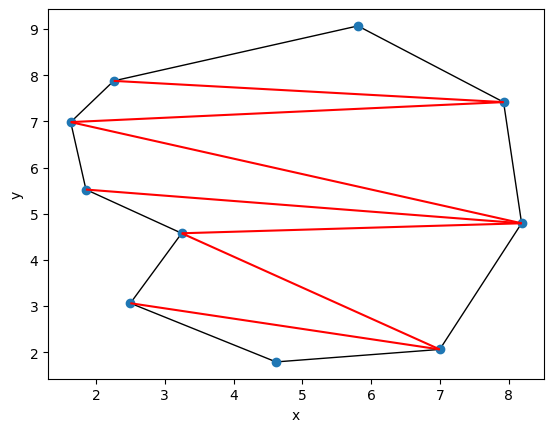

In [70]:
print("Współrzędne wierzchołków: ")
for i in range(len(polygon)):
    print("Punkt nr "+str(i)+": x = "+str(polygon[i][0])+",     y = "+str(polygon[i][1]))
lines = []
for i in range(len(polygon)-1):
    lines.append((i,i+1))
lines.append((len(polygon)-1,0))
tri = triangulation(polygon)
lines = lines + tri
print("\n"+"Wszystkie boki wielokąta po triangulacji: "+str(lines))
print("Przekątne dodane: "+str(tri))
draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

In [71]:
def triangulation_draw(polygon):
    vis = Visualizer()
    if not is_y_monotonic(polygon):
        print("Polygon is not y-monotonic")
        return vis
    sorted_points = sorted(polygon, key = lambda x: x[1])
    y_min = sorted_points[0]
    y_max = sorted_points[-1]
    ind_min = polygon.index(y_min)
    ind_max = polygon.index(y_max)
    left_points=[]
    right_points=[]
    if ind_min<ind_max:
        for i in range(ind_max-1,ind_min-1,-1):
            right_points.append((polygon[i][0],polygon[i][1],i))
        for i in range(ind_max,len(polygon)):
            left_points.append((polygon[i][0],polygon[i][1],i))
        for i in range(ind_min):
            left_points.append((polygon[i][0],polygon[i][1],i))
    else:
        for i in range(ind_max,ind_min):
            left_points.append((polygon[i][0],polygon[i][1],i))
        for i in range(ind_max-1,-1,-1):
            right_points.append((polygon[i][0],polygon[i][1],i))
        for i in range(len(polygon)-1,ind_min-1,-1):
            right_points.append((polygon[i][0],polygon[i][1],i))
    monotonic_points = merge(left_points,right_points)
    stack = [monotonic_points[0],monotonic_points[1]]
    vis.add_line_segment([(polygon[i],polygon[(i+1)]) for i in range(len(polygon)-1)],color="green")
    vis.add_line_segment([polygon[0],polygon[-1]],color="green")
    vis.add_point([(stack[0][0],stack[0][1]),(stack[1][0],stack[1][1])],color="red")
    for i in range(2,len(monotonic_points)):
        current_point = monotonic_points[i]
        vis.add_point((current_point[0],current_point[1]),color="red")
        if current_point[3] != stack[-1][3]:
            for j in range(len(stack)-1,-1,-1):
                if abs(current_point[2]-stack[j][2]) != 1 and abs(current_point[2]-stack[j][2]) != 0 and abs(current_point[2]-stack[j][2]) != len(polygon)-1:
                    vis.add_line_segment((polygon[current_point[2]],polygon[stack[j][2]]),color="red")
            stack=[stack[-1]]
        else:
            last=len(stack)-1
            for j in range(len(stack)-2, -1, -1):
                if abs(current_point[2]-stack[j][2]) != 1 and abs(current_point[2]-stack[j][2]) != 0 and abs(current_point[2]-stack[j][2]) != len(polygon)-1:
                    if current_point[3]=='r' and mat_det_3x3(current_point, stack[j], stack[last])<0 or current_point[3]=='l' and mat_det_3x3(stack[j], current_point, stack[last])<0:
                        vis.add_line_segment((polygon[current_point[2]],polygon[stack[j][2]]),color="red")
                        for k in range(len(stack)-1,last-1,-1):
                            stack.pop()
                        last=j
        stack.append(current_point)
    return vis

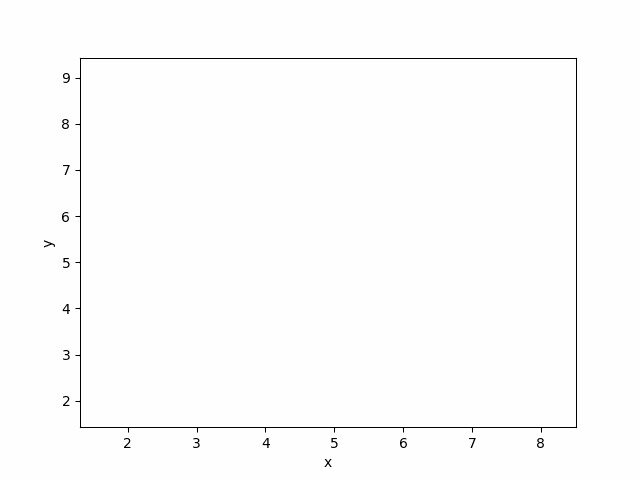

In [72]:
triang_vis=triangulation_draw(polygon)
triang_vis.show_gif()